# Simple Radar

In [1]:
import pamtra2
import collections
import pamtra2.libs.refractiveIndex as refractiveIndex
import numpy as np
import pandas as pn
import xarray as xr
from collections import OrderedDict
from copy import deepcopy, copy
import toolz
import collections
import matplotlib.pyplot as plt

try:
    %matplotlib inline
except:
    pass

In [2]:
import pamtra2.libs.pamgasabs

# create Profile

In [3]:
additionalDims = collections.OrderedDict()
# additionalDims['lat'] = np.linspace(0,90,4)
nHeights = 3

pam2 = pamtra2.pamtra2(
    nLayer=nHeights,
    hydrometeors=['cloud'],
    additionalDims = additionalDims,
    frequencies = [3e9],
)


In [4]:
pam2.profile

<xarray.customProfile>
Dimensions:              (frequency: 1, hydrometeor: 1, layer: 3)
Coordinates:
  * layer                (layer) int64 0 1 2
  * hydrometeor          (hydrometeor) <U5 'cloud'
  * frequency            (frequency) float64 3e+09
Data variables:
    height               (layer) float64 nan nan nan
    temperature          (layer) float64 nan nan nan
    pressure             (layer) float64 nan nan nan
    relativeHumidity     (layer) float64 nan nan nan
    horizontalWind       (layer) float64 nan nan nan
    verticalWind         (layer) float64 nan nan nan
    eddyDissipationRate  (layer) float64 nan nan nan
    hydrometeorContent   (layer, hydrometeor) float64 nan nan nan
    wavelength           (frequency) float64 0.09993

Fill with some dummie values

In [5]:

pam2.profile.height[:] = 1000
pam2.profile.temperature[:] = 250 
pam2.profile.relativeHumidity[:] = 90
pam2.profile.pressure[:] = 100000
pam2.profile.eddyDissipationRate[:] = 1e-3
pam2.profile.horizontalWind[:] = 10
pam2.profile.hydrometeorContent[:] = 1e-4


For testing, dask arrays are turned on by chunking.

In [6]:
pam2.profile = pam2.profile.chunk({ 'frequency':1}) #'lat':1,


pam2.profile 
pam2.addMissingVariables()

<xarray.customProfile>
Dimensions:              (frequency: 1, hydrometeor: 1, layer: 3)
Coordinates:
  * layer                (layer) int64 0 1 2
  * hydrometeor          (hydrometeor) <U5 'cloud'
  * frequency            (frequency) float64 3e+09
Data variables:
    height               (layer) float64 dask.array<shape=(3,), chunksize=(3,)>
    temperature          (layer) float64 dask.array<shape=(3,), chunksize=(3,)>
    pressure             (layer) float64 dask.array<shape=(3,), chunksize=(3,)>
    relativeHumidity     (layer) float64 dask.array<shape=(3,), chunksize=(3,)>
    horizontalWind       (layer) float64 dask.array<shape=(3,), chunksize=(3,)>
    verticalWind         (layer) float64 dask.array<shape=(3,), chunksize=(3,)>
    eddyDissipationRate  (layer) float64 dask.array<shape=(3,), chunksize=(3,)>
    hydrometeorContent   (layer, hydrometeor) float64 dask.array<shape=(3, 1), chunksize=(3, 1)>
    wavelength           (frequency) float64 dask.array<shape=(1,), chunksize=

In [7]:
# # OR EASIER if desired: 
# pam2 = pamtra2.importers.profiles.usStandardAtmosphere(heigths)

# Describe Hydrometeors
To describe the hydrometeors, you can use functions, xr.DataArrays or scalars. Teh functions must support xr.DataArrays. The kwargs of the functions are gathered from (in this order)

1. pam2.hydrometors.name.profile variables (name must match). E.g. density (after it has been calculated) 
2. pam2.profile variables (name must match). E.g. temperature
3. Other provided kwargs (e.g. Dmin, DMax, N0 etc)
4. Default function arguments. Can be turned of with useFuncArgDefaults = False to make sure everything is explicitly covered.



In [8]:
pam2.addHydrometeor(
    pamtra2.hydrometeors.cloud(
        name = 'cloud',
        Dmin  = 0.0001 - .5e-10,
        Dmax  = 0.0001 + .5e-10,
        scattering = pamtra2.hydrometeors.scattering.Mie,
    )
)


# pam2.describeHydrometeor(
#     pamtra2.hydrometeors.softEllipsoidFixedDensity,
#     name = 'cloud', #or None, then str(index)
#     nBins =2,
#     sizeBounds = pamtra2.hydrometeors.size.linspaceBounds, 
#     sizeCenter = pamtra2.hydrometeors.size.boundsToMid,
#     sizeBoundsWidth = pamtra2.hydrometeors.size.boundsWidth,
#     sizeDistribution = pamtra2.hydrometeors.sizeDistribution.monoDisperse, 
#     aspectRatio = 1.0,
#     mass = pamtra2.hydrometeors.mass.ellipsoid,
#     density = pamtra2.hydrometeors.density.water,
#     crossSectionArea = pamtra2.hydrometeors.crossSectionArea.sphere,
#     relativePermittivity = refractiveIndex.water.turner_kneifel_cadeddu, #replace with refractiveIndex.water.Turner.n
#     scattering = pamtra2.hydrometeors.scattering.Rayleigh,
#     fallVelocity = pamtra2.hydrometeors.fallVelocity.khvorostyanov01_drops,
#     Dmin  = 0.001 - .5e-10,
#     Dmax  = 0.001 + .5e-10,
#     Ntot =  xr.DataArray(np.logspace(-2,2,nHeights),coords=[pam2.profile.layer]),
# #     Ntot = 10,
#     useFuncArgDefaults = False,
# )


/Volumes/User/mmaahn/anaconda/envs/python3/lib/python3.6/_collections_abc.py:720: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  yield from self._mapping
/Volumes/User/mmaahn/anaconda/envs/python3/lib/python3.6/site-packages/pamtra2-0.1-py3.6-macosx-10.9-x86_64.egg/pamtra2/hydrometeors/core.py:309: FutureWarning: xarray.DataArray.__contains__ currently checks membership in DataArray.coords, but in xarray v0.11 will change to check membership in array values.
  if key in self.profile[key]:
/Volumes/User/mmaahn/anaconda/envs/python3/lib/python3.6/site-packages/pamtra2-0.1-py3.6-macosx-10.9-x86_64.egg/pamtra2/hydrometeors/core.py:313: FutureWarning: xarray.DataArray.__contains__ currently checks membership in DataArray.coords, but in xarray v0.11 will change to check membership in array values.
  

The profile arrays have been populated, but they contain daks arrays. These are only placeholders, they have not been calculated yet!

# Radar simulator


In [9]:
pam2.addInstrument(
    pamtra2.instruments.radar.simpleRadar(
        name='simple',
        frequencies=3e9,
        radarK2=0.93,
    )
)

In [10]:
pam2.instruments.simple.results.load()

/Volumes/User/mmaahn/anaconda/envs/python3/lib/python3.6/site-packages/pamtra2-0.1-py3.6-macosx-10.9-x86_64.egg/pamtra2/libs/singleScattering/scattering_utilities.py:158: RuntimeWarning: invalid value encountered in double_scalars
  alpha = np.arccos((cos_sca-cos_th*cos_inc)/(sin_th*sin_inc))
/Volumes/User/mmaahn/anaconda/envs/python3/lib/python3.6/site-packages/pamtra2-0.1-py3.6-macosx-10.9-x86_64.egg/pamtra2/libs/singleScattering/scattering_utilities.py:159: RuntimeWarning: invalid value encountered in double_scalars
  beta = np.arccos((cos_inc-cos_th*cos_sca)/(sin_th*sin_sca))


<xarray.Dataset>
Dimensions:                    (frequency: 1, layer: 3)
Coordinates:
  * layer                      (layer) int64 0 1 2
  * frequency                  (frequency) float64 3e+09
Data variables:
    specificAttenuation        (frequency, layer) float64 1.22e-05 1.22e-05 ...
    pathIntegratedAttBottomUp  (frequency, layer) float64 0.0 0.0 0.0
    pathIntegratedAttTopDown   (frequency, layer) float64 0.0 0.0 0.0
    radarReflectivity          (frequency, layer) float64 -7.158 -7.158 -7.158

In [11]:
pam2.addInstrument(
    pamtra2.instruments.radar.dopplerRadarPamtra(
        name = 'spectral',
        frequencies = 3e9,    
            verbosity=10,
        radarNAve =150,
        momentsNPeaks = 1,
        seed = 11,
        radarAliasingNyquistInterv = 0,
        radarPNoise1000 = -100
    )
)



In [12]:
pam2.instruments.spectral.results.load()

/Volumes/User/mmaahn/anaconda/envs/python3/lib/python3.6/site-packages/pamtra2-0.1-py3.6-macosx-10.9-x86_64.egg/pamtra2/libs/singleScattering/scattering_utilities.py:158: RuntimeWarning: invalid value encountered in double_scalars
  alpha = np.arccos((cos_sca-cos_th*cos_inc)/(sin_th*sin_inc))
/Volumes/User/mmaahn/anaconda/envs/python3/lib/python3.6/site-packages/pamtra2-0.1-py3.6-macosx-10.9-x86_64.egg/pamtra2/libs/singleScattering/scattering_utilities.py:159: RuntimeWarning: invalid value encountered in double_scalars
  beta = np.arccos((cos_inc-cos_th*cos_sca)/(sin_th*sin_sca))


<xarray.Dataset>
Dimensions:                    (dopplerVelocity: 256, dopplerVelocityAliased: 256, frequency: 1, layer: 3, peak: 1)
Coordinates:
  * layer                      (layer) int64 0 1 2
  * frequency                  (frequency) float64 3e+09
  * dopplerVelocity            (dopplerVelocity) float64 -7.885 -7.823 ...
  * peak                       (peak) int64 1
Dimensions without coordinates: dopplerVelocityAliased
Data variables:
    specificAttenuation        (frequency, layer) float64 1.22e-05 1.22e-05 ...
    pathIntegratedAttBottomUp  (frequency, layer) float64 0.0 0.0 0.0
    pathIntegratedAttTopDown   (frequency, layer) float64 0.0 0.0 0.0
    radarIdealizedSpectrum     (dopplerVelocityAliased, layer, frequency) float64 0.0 ...
    radarSpectrum              (dopplerVelocity, layer, frequency) float64 6.777e-12 ...
    radarReflectivity          (peak, layer, frequency) float64 -7.208 ...
    meanDopplerVel             (peak, layer, frequency) float64 0.2442 ...
    s

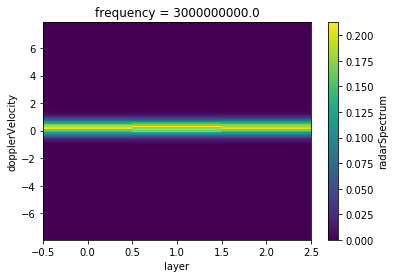

In [13]:
pam2.instruments.spectral.results.radarSpectrum.plot()